# Q6

## Import Libraries

In [1]:
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

## Load Data

In [2]:
data = None
with open('Data' + os.sep + 'hw1q6_data.csv') as fp:
    data = [x.strip().split(',') for x in fp.readlines()]
    
headers = data[0]
class_field = len(headers)-1
data = [[int(x[i]) if i==class_field else float(x[i]) for i in range(len(x))] for x in data[1:]]

print('Total Observations - ' + str(len(data)) + '\n')
print('Attributes - ')
print('\t'.join([x[:6] for x in headers]))
for i in range(len(data[:10])):
    print('\t'.join(['{}'.format(x) for x in data[i]]))
print('...')
print(str(len(data)-10) + ' more rows.')

Total Observations - 768

Attributes - 
Glucos	BloodP	SkinTh	BMI	Diabet	Age	Class
148.0	72.0	35.0	33.6	0.627	50.0	1
85.0	66.0	29.0	26.6	0.351	31.0	0
183.0	64.0	0.0	23.3	0.672	32.0	1
89.0	66.0	23.0	28.1	0.167	21.0	0
137.0	40.0	35.0	43.1	2.288	33.0	1
116.0	74.0	0.0	25.6	0.201	30.0	0
78.0	50.0	32.0	31.0	0.248	26.0	1
115.0	0.0	0.0	35.3	0.134	29.0	0
197.0	70.0	45.0	30.5	0.158	53.0	1
125.0	96.0	0.0	0.0	0.232	54.0	1
...
758 more rows.


## Helper Functions

In [3]:
def countPatients(data):
    diabetic = 0
    nondiabetic = 0
    
    for i in data[:,6]:
        if i == 1:
            diabetic += 1
        else:
            nondiabetic += 1
    
    return (diabetic, nondiabetic)

## (A) Number of diabetic and nondiabetic patients

In [4]:
data = np.asarray(data)
diabetic, nondiabetic = countPatients(data)
print(f'Number of diabetic patients in the dataset: {diabetic}')
print(f'Number of nondiabetic patients in the dataset: {nondiabetic}')

Number of diabetic patients in the dataset: 268
Number of nondiabetic patients in the dataset: 500


## (B) Missing rate for each feature

In [5]:
def countMissingValue(data):
    missing_values = 0
    for i in data:
        if i == 0:
            missing_values += 1
    return '{:.2f}'.format(missing_values/len(data) * 100)
    
print('Missing Rates:')
for i in range(len(headers)-1):
    percent = countMissingValue(data[:,i])
    print(f'{headers[i]} : {percent}% ')

Missing Rates:
Glucose : 0.65% 
BloodPressure : 4.56% 
SkinThickness : 29.56% 
BMI : 1.43% 
DiabetesPedigreeFunction : 0.00% 
Age : 0.00% 


## (C) Methods to handle missing data

### Listwise Deletion

The most simple method for handling missing data is to simply remove/neglect the rows (objects) having at least one missing attribute and analyze the rest of the data.

**Advantages**:
- The remaining dataset is complete and accurate.
- Most frequently used method in many fields. Therefore it is also called the default option in many statistical procedures in statistical libraries. 

**Disadvantages**: 
- Reduced sample size caused by removing incomplete data
- If there is not a large sample or the assumption of missing completely at random is not satisfied, this is not the optimal strategy.		
- It increases chance of having a biased dataset to be substantial if data is not most completely at random.

---

### Mean Substitution

As the name suggests, the missing data value for the attribute of a row(object) is replaced by mean value of that attribute in place of that. 					 				

**Advantages**:
- Allows the whole data to be used for analysis in a given incomplete dataset.
- As mean seems a reasonable estimate for a randomly selected observation from given normal distribution.

**Disadvantages**: 		
- For missing values that are not strictly random, especially in presence of a great inequality in number of missing values for different variables, the mean substitution method may lead to inconsistent bias. 
- May underestimate the error.

## Removing missing data, rows of patient

In [6]:
remaining_data = data[(data[:,0:6]!=0).all(1)]
print('Total Observations - ' + str(len(remaining_data)) + '\n')
print('Attributes - ')
print('\t'.join([x[:6] for x in headers]))
for i in range(len(remaining_data[:10])):
    print('\t'.join(['{}'.format(x) for x in remaining_data[i]]))
print('...')
print(str(len(remaining_data)-10) + ' more rows.')

Total Observations - 532

Attributes - 
Glucos	BloodP	SkinTh	BMI	Diabet	Age	Class
148.0	72.0	35.0	33.6	0.627	50.0	1.0
85.0	66.0	29.0	26.6	0.351	31.0	0.0
89.0	66.0	23.0	28.1	0.167	21.0	0.0
137.0	40.0	35.0	43.1	2.288	33.0	1.0
78.0	50.0	32.0	31.0	0.248	26.0	1.0
197.0	70.0	45.0	30.5	0.158	53.0	1.0
189.0	60.0	23.0	30.1	0.398	59.0	1.0
166.0	72.0	19.0	25.8	0.587	51.0	1.0
118.0	84.0	47.0	45.8	0.551	31.0	1.0
103.0	30.0	38.0	43.3	0.183	33.0	0.0
...
522 more rows.


In [7]:
print('After removing missing data, missing Rates:')
for i in range(len(headers)-1):
    percent = countMissingValue(remaining_data[:,i])
    print(f'{headers[i]} : {percent}%')

After removing missing data, missing Rates:
Glucose : 0.00%
BloodPressure : 0.00%
SkinThickness : 0.00%
BMI : 0.00%
DiabetesPedigreeFunction : 0.00%
Age : 0.00%


## (D) Number of diabetic and nondiabetic patients in remaining data

In [8]:
diabetic, nondiabetic = countPatients(remaining_data)
print(f'Number of diabetic patients in the dataset: {diabetic}')
print(f'Number of nondiabetic patients in the dataset: {nondiabetic}')

Number of diabetic patients in the dataset: 177
Number of nondiabetic patients in the dataset: 355


## (E) Summary Statistics

In [9]:
print('After removing missing data, Statistics:')
for i in range(len(headers)-1):
    mean = np.average(remaining_data[:,i])
    median = np.median(remaining_data[:,i])
    std_deviation = np.std(remaining_data[:,i])
    data_range = np.ptp(remaining_data[:,i])
    percentile_25 = np.percentile(remaining_data[:,i],25)
    percentile_50 = np.percentile(remaining_data[:,i],50)
    percentile_75 = np.percentile(remaining_data[:,i],75)
    print(f'\n{headers[i]} :-> Mean: {mean:.3f}, \n\t Median: {median:.3f}, \n\t Standard Deviation: {std_deviation:.3f}, \n\t Range: {data_range:.3f}, '
          f'\n\t 25th percentile: {percentile_25:.3f}, \n\t 50th percentile: {percentile_50:.3f}, \n\t 75th percentile: {percentile_75:.3f}')

After removing missing data, Statistics:

Glucose :-> Mean: 121.030, 
	 Median: 115.000, 
	 Standard Deviation: 30.970, 
	 Range: 143.000, 
	 25th percentile: 98.750, 
	 50th percentile: 115.000, 
	 75th percentile: 141.250

BloodPressure :-> Mean: 71.506, 
	 Median: 72.000, 
	 Standard Deviation: 12.299, 
	 Range: 86.000, 
	 25th percentile: 64.000, 
	 50th percentile: 72.000, 
	 75th percentile: 80.000

SkinThickness :-> Mean: 29.182, 
	 Median: 29.000, 
	 Standard Deviation: 10.514, 
	 Range: 92.000, 
	 25th percentile: 22.000, 
	 50th percentile: 29.000, 
	 75th percentile: 36.000

BMI :-> Mean: 32.890, 
	 Median: 32.800, 
	 Standard Deviation: 6.875, 
	 Range: 48.900, 
	 25th percentile: 27.875, 
	 50th percentile: 32.800, 
	 75th percentile: 36.900

DiabetesPedigreeFunction :-> Mean: 0.503, 
	 Median: 0.416, 
	 Standard Deviation: 0.344, 
	 Range: 2.335, 
	 25th percentile: 0.259, 
	 50th percentile: 0.416, 
	 75th percentile: 0.659

Age :-> Mean: 31.615, 
	 Median: 28.000, 
	 St

## (F) Histograms for Blood Pressure and Diabetes Pedigree Function

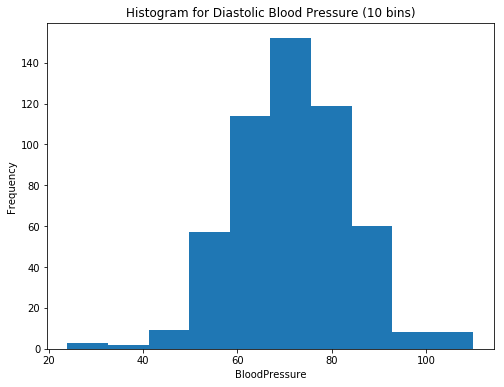

In [10]:
#Histogram for Blood Pressure
bins = np.histogram(remaining_data[:,1])
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(6)
fig.set_figwidth(8)
axes.set_title('Histogram for Diastolic Blood Pressure (10 bins)')
axes.set_xlabel(headers[1])
axes.set_ylabel('Frequency')
axes.hist(remaining_data[:,1], bins[1])
plt.show()

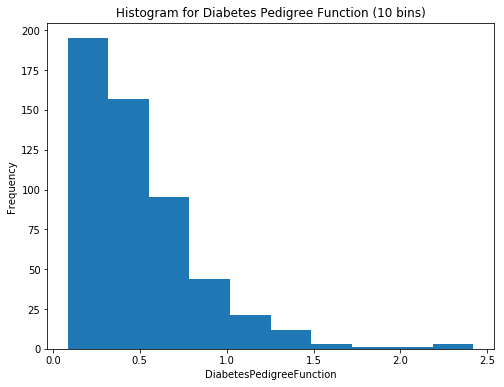

In [11]:
#Histogram for DiabetesPedigreeFunction
bins = np.histogram(remaining_data[:,4])
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(6)
fig.set_figwidth(8)
axes.set_title('Histogram for Diabetes Pedigree Function (10 bins)')
axes.set_xlabel(headers[4])
axes.set_ylabel('Frequency')
axes.hist(remaining_data[:,4], bins[1])
plt.show()

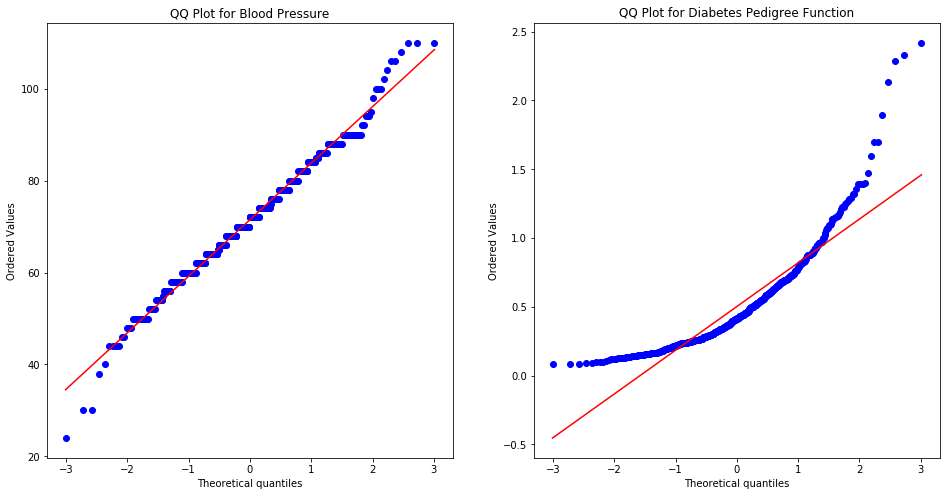

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(16)
stats.probplot(remaining_data[:,1], plot=axes[0])
stats.probplot(remaining_data[:,4], plot=axes[1])
axes[0].set_title('QQ Plot for Blood Pressure')
axes[1].set_title('QQ Plot for Diabetes Pedigree Function')
plt.show()

## (G) QQ Plot Analysis

QQ Plot is often used to compare the distribution of data with the standard normal distibution. This helps us in predicting the shape of the distribution and figure out how to select outliers.

If we extend the zero point on x-axis to the red line, the y co-ordinate of that intersection will be the mean of our distribution. We compare the other points with a horizontal line parallel to x-axis that passes through that intersection. The red line then dictates how far the points should be from the mean if our distribution is similar to the standard normal distribution.

Long tails mean that the values at extremes of the distribution have a higher chance of occuring when compared with the standard normal distribution. Short tails mean that there are limited values with significant probability of occuring compared to the standard normal distribution.

- QQ Plot for Blood Pressure - We can see that on the left hand of 0 on the x-axis, the values are deviating from the red line and ***away*** from mean. This means that the distribution of Blood Pressure has a ***long left tail***. Similarly, the values on to the right of 0 are also deviating from the red line and ***away*** from the mean, which means that the Blood Pressure distribution has a ***long right tail***.
- QQ Plot for Diabetes Pedigree Function - We can see that on the left hand of 0 on the x-axis, the values are deviating largely from the red line and ***towards*** the mean. This means that the distribution of Diabetes Pedigree Function has a ***very short left tail***. On the contrary, the values to the right of 0 are deviating largely from the red line but ***away*** from the mean, which mean that Diabetes Pedigree Function distibution has a ***long right tail***.

These conclusions can be backed by looking at the histograms we plotted above. They show the same structure as suggested here.